#Data Analysis — CAMH

At first, I wanted to choose a dataset related to women's health, specifically focusing on Polycystic Ovary Syndrome (PCOS). However, I couldn’t find a suitable dataset for that topic.

This is a personal project created with the goal of practicing data analysis techniques in the context of health-related datasets and improving my understanding of statistical relationships in medical data.

Eventually, I decided to work with this dataset instead, which I found at https://www.kaggle.com/datasets/debjeetdas/babies-birth-weight.

These are the characteristics of the different features:

btw – birth weight of the newborn (in ounces)

gestation – duration of gestation (in days)

parity – parity of the mother (0 = first birth, 1 = not the first birth)

age – age of the mother (in years)

height – height of the mother (in inches)

weight – weight of the mother (in pounds)

smoke – smoking status (no clear legend provided, but assumed 0 = non-smoker, 1 = smoker)

## Color Palette and Lib Imports

These are the main colors that I will use throughout the project, as well as the general libraries that will be used across the entire analysis. I will add additional sub-libraries as needed in each section.

To keep the color scheme consistent across all visualizations, I’ll define my custom color palette here:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
palette_cami = sns.cubehelix_palette(3)
palette_hex = sns.cubehelix_palette(3).as_hex()
rosita, malva, morado = palette_hex

## Data Preprocessing and Exploration

In this section, I perform an initial exploration of the dataset to understand its structure, check for missing values, and prepare the data for subsequent analysis.

In [ ]:
df = pd.read_csv('babies.csv')
print("Tamaño del dataframe (individuos, features): ",df.shape)
print("Primeros 5 registros: ")
df.head(5)

Tamaño del dataframe (individuos, features):  (1236, 8)
Primeros 5 registros: 


,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


When observing the dataset, I noticed that there are many missing values (NA).

I’ll print the data to confirm this and then start the preprocessing phase.

In [ ]:
print(df.isnull().sum())

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64


Now I’m going to clean the dataset and examine the characteristics of each feature to get a better understanding of the data.

In [ ]:
df_clean = df.dropna()
print("Información general: ")
df_clean.describe(include='all')

Información general: 


,case,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,624.812606,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,356.777054,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,317.250000,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,625.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,934.750000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


# Categorization

The World Health Organization (WHO) considers pregnancies in adolescents (under 20 years old) to be high-risk due to both medical and social complications.
In addition, the American College of Obstetricians and Gynecologists (ACOG) defines pregnancies in women aged 35 or older as “advanced maternal age,” which is also considered high-risk from an obstetric perspective.

In [ ]:
def clasif_risk(age):
    if age < 20 or age >= 35:
        return 'high'
    else:
        return 'low'

df_clean['risk'] = df_clean['age'].apply(clasif_risk)
print(df_clean[['age', 'risk']].head(60))

     age  risk
0   27.0   low
1   33.0   low
2   28.0   low
4   23.0   low
5   25.0   low
6   33.0   low
7   23.0   low
8   25.0   low
9   30.0   low
10  27.0   low
11  32.0   low
12  23.0   low
13  36.0  high
14  30.0   low
15  38.0  high
16  25.0   low
17  33.0   low
18  33.0   low
19  43.0  high
20  22.0   low
21  27.0   low
22  25.0   low
23  30.0   low
24  23.0   low
25  27.0   low
26  26.0   low
27  20.0   low
28  32.0   low
29  28.0   low
30  26.0   low
31  34.0   low
32  30.0   low
33  23.0   low
34  24.0   low
35  22.0   low
36  24.0   low
37  23.0   low
38  27.0   low
40  30.0   low
41  23.0   low
43  27.0   low
44  37.0  high
45  27.0   low
46  32.0   low
47  25.0   low
48  26.0   low
49  26.0   low
50  26.0   low
51  31.0   low
52  28.0   low
53  31.0   low
54  30.0   low
55  22.0   low
56  26.0   low
57  33.0   low
58  28.0   low
59  33.0   low
60  24.0   low
61  22.0   low
62  23.0   low


<ipython-input-5-306478095>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['risk'] = df_clean['age'].apply(clasif_risk)


,risk
risk,
high,229
low,945


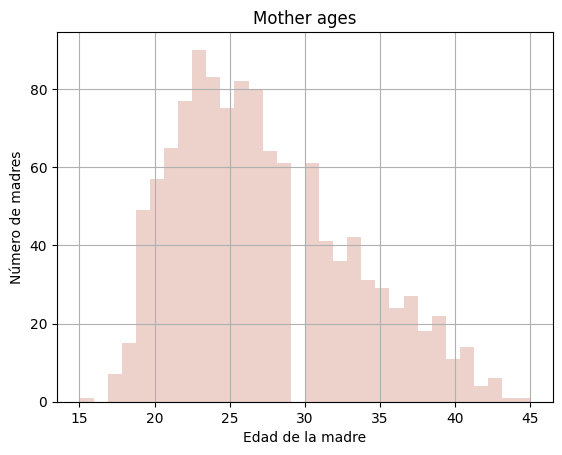

In [ ]:
df_clean['age'].hist(bins=32, range=[15,45], color=rosita)
plt.title("Mother ages")
plt.xlabel("Mother ages")
plt.ylabel("Number of mothers")
df_clean['risk'].groupby(df_clean['risk']).count()

Before 37 weeks of gestation, a baby is considered premature (259 days = 37 weeks).
Let’s classify the newborns according to this criterion.

In [ ]:
def clasif_baby(gestation):
    umbral = 259
    return 'Preterm' if gestation < umbral else 'Full Term'

df_clean['term'] = df_clean['gestation'].apply(clasif_baby)
print(df_clean[['gestation', 'term']].head(60))

    gestation       term
0       284.0  Full Term
1       282.0  Full Term
2       279.0  Full Term
4       282.0  Full Term
5       286.0  Full Term
6       244.0    Preterm
7       245.0    Preterm
8       289.0  Full Term
9       299.0  Full Term
10      351.0  Full Term
11      282.0  Full Term
12      279.0  Full Term
13      281.0  Full Term
14      273.0  Full Term
15      285.0  Full Term
16      255.0    Preterm
17      261.0  Full Term
18      261.0  Full Term
19      288.0  Full Term
20      270.0  Full Term
21      274.0  Full Term
22      287.0  Full Term
23      276.0  Full Term
24      294.0  Full Term
25      261.0  Full Term
26      280.0  Full Term
27      266.0  Full Term
28      292.0  Full Term
29      274.0  Full Term
30      270.0  Full Term
31      278.0  Full Term
32      268.0  Full Term
33      275.0  Full Term
34      281.0  Full Term
35      283.0  Full Term
36      279.0  Full Term
37      288.0  Full Term
38      267.0  Full Term
40      293.0  Full Term


<ipython-input-7-310123898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['term'] = df_clean['gestation'].apply(clasif_baby)


## Correlation

In [ ]:
df_clean[['age', 'gestation']].corr()

,age,gestation
age,1.000000,-0.053425
gestation,-0.053425,1.000000


In [ ]:
df_clean[['age', 'bwt']].corr()

,age,bwt
age,1.000000,0.026983
bwt,0.026983,1.000000


In [ ]:
df_clean[['gestation', 'bwt']].corr()

,gestation,bwt
gestation,1.000000,0.407543
bwt,0.407543,1.000000


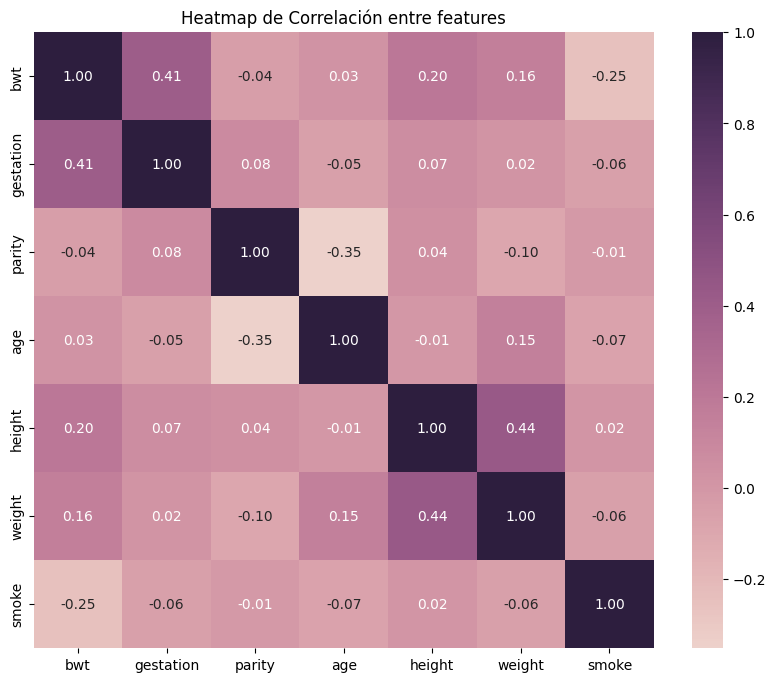

In [ ]:
columnas = ['bwt', 'gestation', 'parity', 'age', 'height', 'weight', 'smoke']
df_sub = df_clean[columnas]
correlation_matrix = df_sub.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap = sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Heatmap de Correlación entre features')
plt.show()

I’m not finding many significant correlations.
I need to remove the outliers, and then I might be able to obtain different correlations.

## Outliers

In [ ]:
def bye_outliers_iqr(df):
    df_clean1 = df.copy()
    for columna in df_clean1.select_dtypes(include=['number']).columns:
        Q1 = df_clean1[columna].quantile(0.25)
        Q3 = df_clean1[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Elimina filas que tengan outliers en esta columna
        df_clean1 = df_clean1[(df_clean1[columna] >= lower_bound) & (df_clean1[columna] <= upper_bound)]
    return df_clean1

df_nonoutliers = bye_outliers_iqr(df_clean)

print(f"Original: {df.shape[0]} rows")
print(f"W/o NA: {df_clean.shape[0]} rows")
print(f"No outliers: {df_nonoutliers.shape[0]} rows")

Original: 1236 filas
Sin valores nulos: 1174 filas
Sin outliers: 1045 filas


I don’t have many outliers, so I suspect that the results won’t differ much from the previous correlation matrix.

Now, I’ll create the correlation matrix again, this time without the outliers.

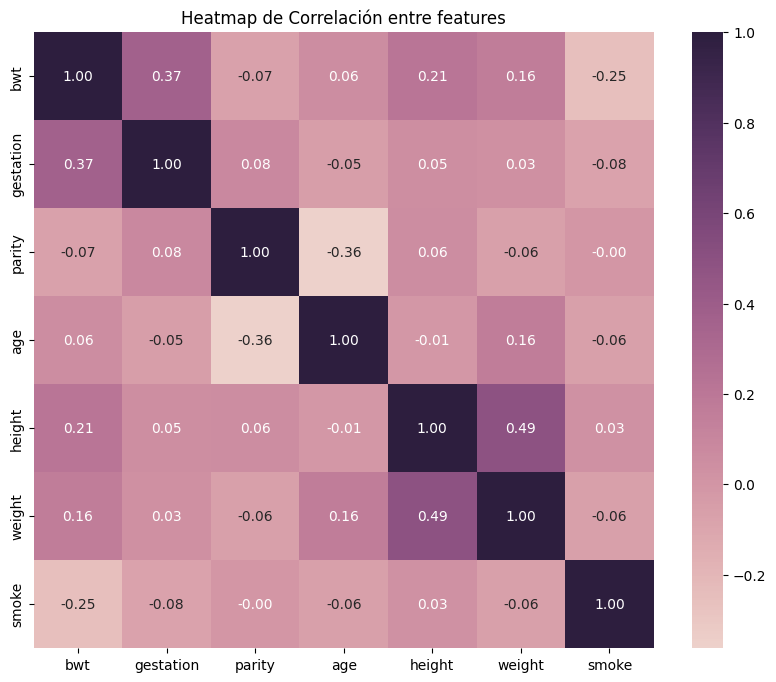

In [ ]:
df_sub1 = df_nonoutliers[columnas]
correlation_matrix1 = df_sub1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap = sns.cubehelix_palette(as_cmap=True), fmt=".2f")
plt.title('Heatmap de Correlación entre features')
plt.show()

## Clustering

Since there is no significant correlation, I won’t start with linear regression.
Instead, I will explore whether I can detect any clusters in the data.
If I observe any clear trends, I may apply linear regression later on.

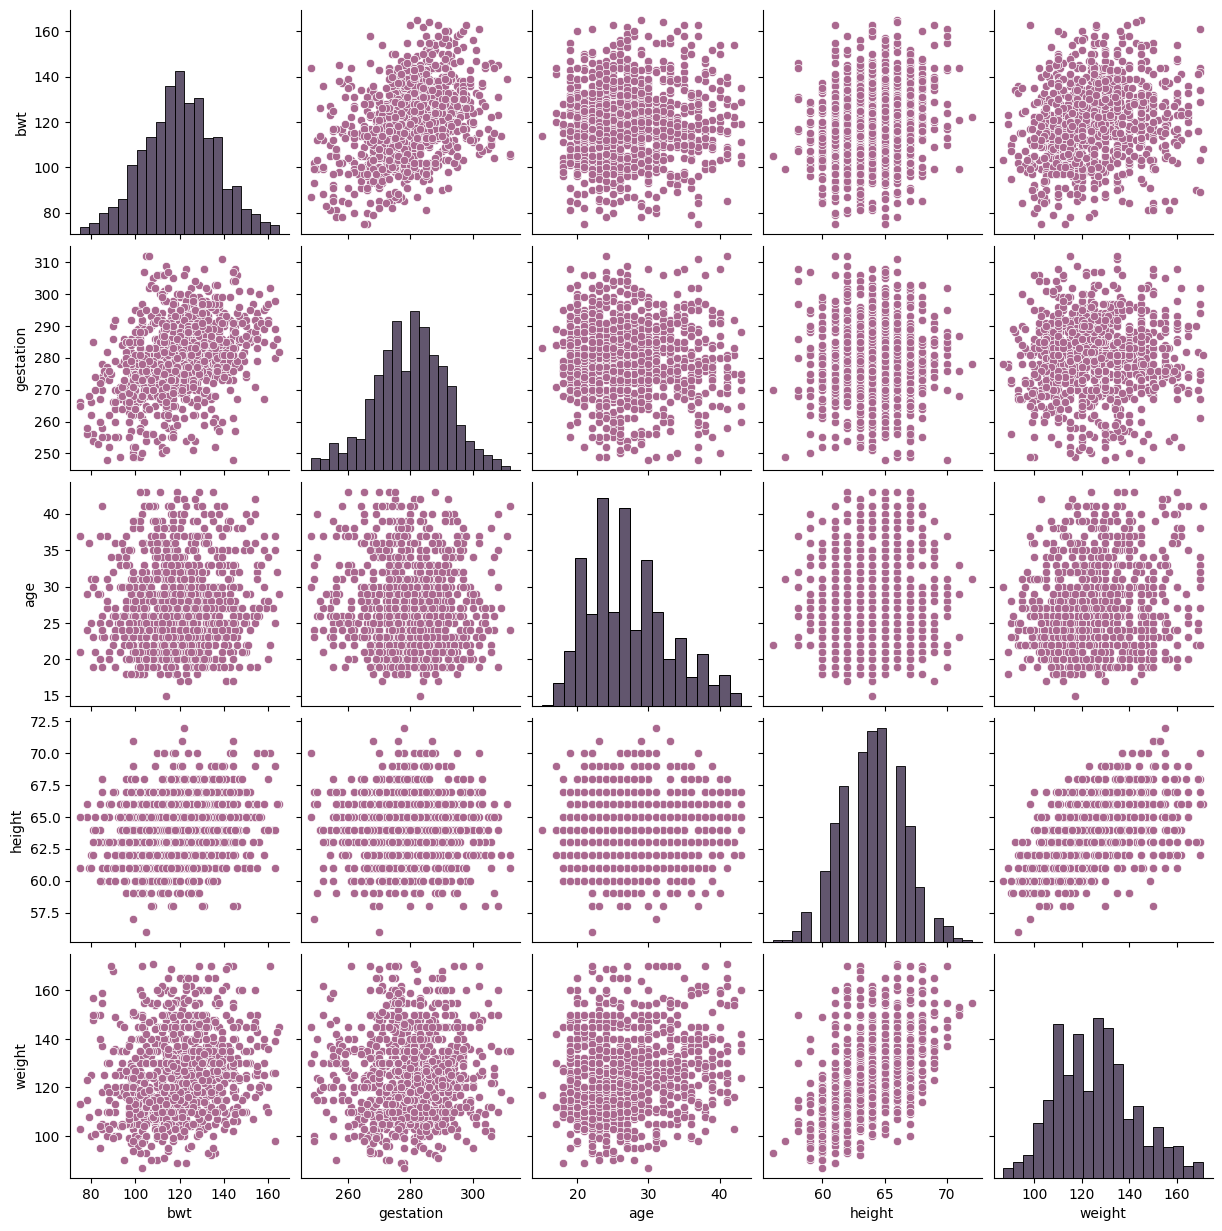

In [ ]:
numerical = ['bwt','gestation','age','height','weight']
sns.pairplot(
    df_nonoutliers[numerical],
    plot_kws={'color': malva},
    diag_kws={'color': morado}
)


##Conclusions from Observing the Plots

**Linear Relationships:**
Weight vs. height appears to have a positive correlation, as does birth weight (bwt) vs. gestation. The latter is less significant due to the considerable data dispersion, making it difficult to accurately predict a baby’s weight based on gestational age.

**Normal Distribution:**
Symmetrical, bell-shaped histograms—such as those for gestation, height, or bwt—suggest that these features are approximately normally distributed.

**Clustering:**
I don’t observe any clear clusters, so I won’t perform clustering (at least not meaningfully; I could force it just to demonstrate the method, but that’s all).

parity   0   1
age           
15.0     0   1
17.0     0   4
18.0     2  11
19.0    10  31
20.0    23  27
21.0    25  36
22.0    41  28
23.0    56  21
24.0    60  19
25.0    51  19
26.0    57  18
27.0    57  16
28.0    44  13
29.0    46   6
30.0    54   3
31.0    30   8
32.0    28   4
33.0    30   5
34.0    20   5
35.0    24   2
36.0    20   2
37.0    21   3
38.0    15   0
39.0    16   0
40.0     9   1
41.0    13   0
42.0     4   0
43.0     6   0


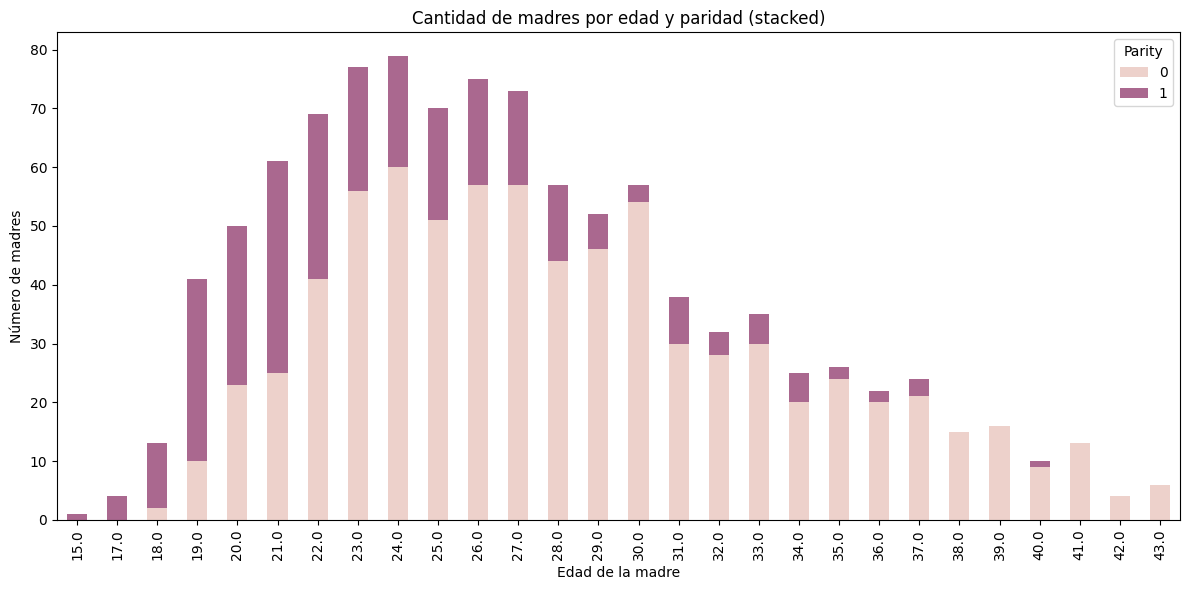

In [ ]:
tabla = df_nonoutliers.groupby(['age', 'parity']).size().unstack(fill_value=0)
print(tabla)
tabla.plot(kind='bar', stacked=True, figsize=(12, 6), color=(rosita, malva))
plt.xlabel("Edad de la madre")
plt.ylabel("Número de madres")
plt.title("Cantidad de madres por edad y paridad (stacked)")
plt.legend(title="Parity")
plt.tight_layout()
plt.show()

Since *age vs. parity* shows a certain level of correlation (0.36) in the correlation matrix, but parity is a binary feature, I created this grouping plot to better visualize the data.

I don’t see a relationship that aligns with common expectations, but I won’t judge the data—even if it seems anomalous—because in this dataset, older women are more often first-time mothers than younger women. This appears contrary to what is typically expected.

Now I will perform clustering by forcing the data using K-means.

Although no clear clusters were observed previously, I’m doing this to demonstrate the application of the K-means algorithm and show that I can implement clustering techniques. This is purely for practice and does not imply that meaningful clusters exist in this dataset.

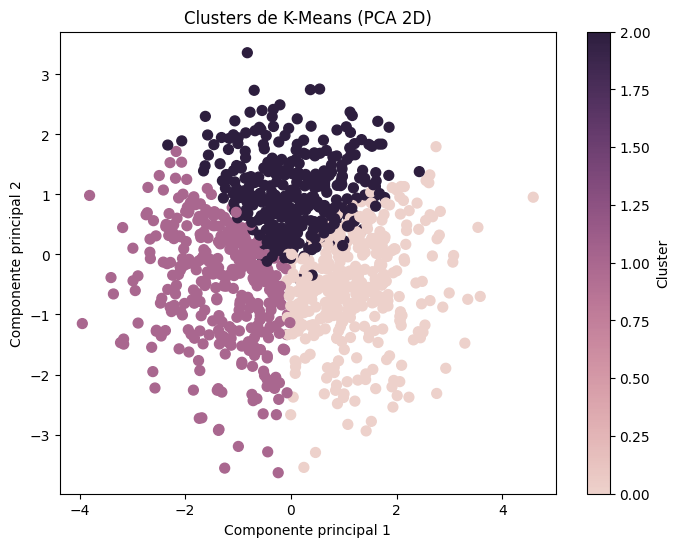

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df_nonoutliers[['bwt', 'gestation', 'age', 'height', 'weight']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df_nonoutliers['cluster'] = kmeans.labels_
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

cmap = sns.cubehelix_palette(as_cmap=True)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap = cmap, s=50)
plt.title("Clusters de K-Means (PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.colorbar(label='Cluster')
plt.show()


I applied PCA (Principal Component Analysis) to reduce the dimensionality of the dataset so that it could be visualized in a two-dimensional plot.
I chose 𝐾=3 for the K-means clustering and combined the remaining variables into the two principal components displayed in the graph.

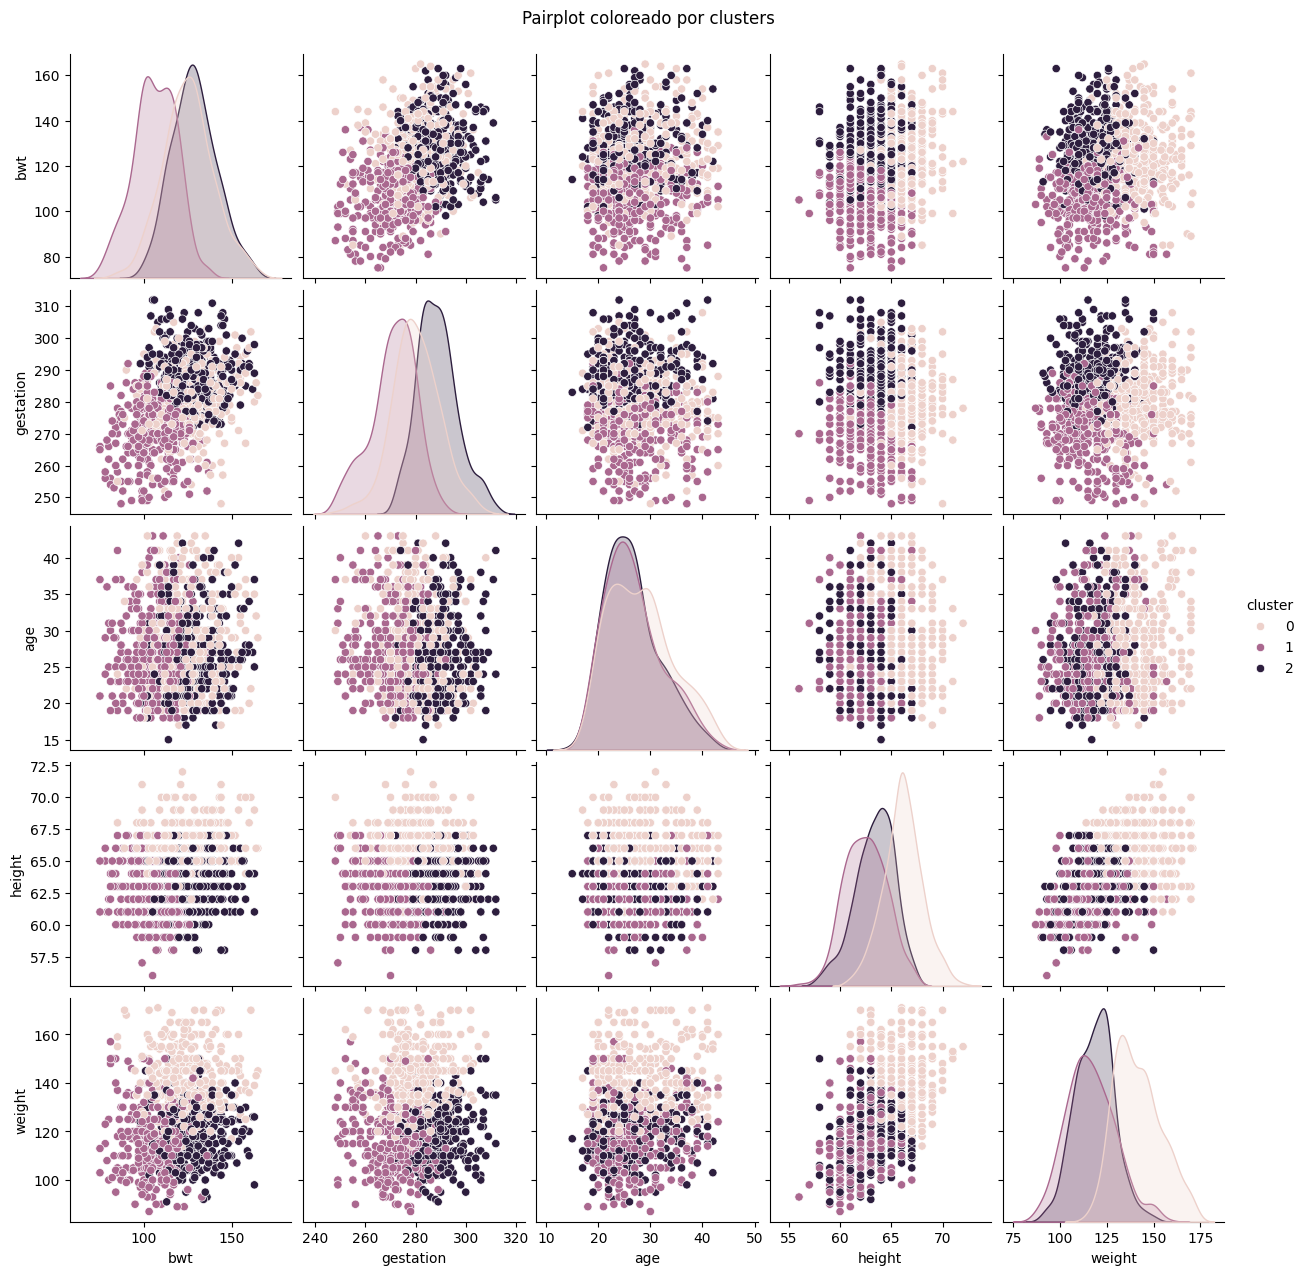

[[0.9312692223325372, 0.8201921796082118, 0.7971480974663592], [0.6672565752652589, 0.40671838146419587, 0.5620016466433286], [0.1750865648952205, 0.11840023306916837, 0.24215989137836502]]


In [ ]:
sns.pairplot(df_nonoutliers, vars=['bwt', 'gestation', 'age', 'height', 'weight'], hue='cluster', palette = palette_cami)
plt.suptitle("Pairplot coloreado por clusters", y=1.02)
plt.show()
print(sns.cubehelix_palette(3))

## Linear Regression

I will perform a linear regression on the data that appears to have a linear dispersion and also shows the highest values in the correlation matrix.

Intercepto: -84.17880594820278
Pendiente: 3.2794033997469336


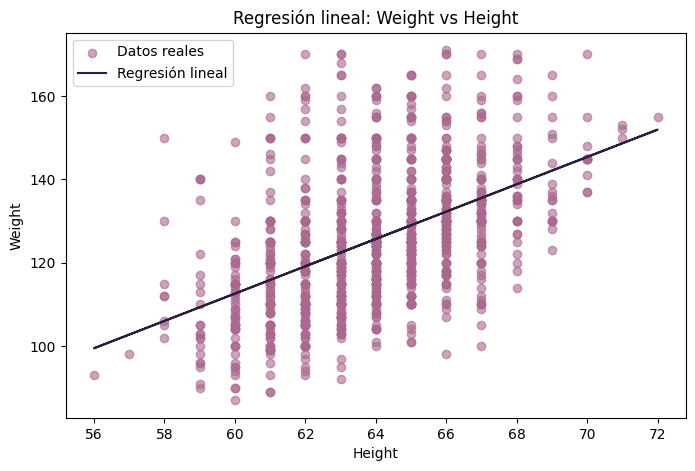

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_nonoutliers[['height']]
y = df_nonoutliers['weight']

modelo = LinearRegression()
modelo.fit(X, y)

print(f"Intercepto: {modelo.intercept_}")
print(f"Pendiente: {modelo.coef_[0]}")

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color=malva, label='Datos reales', alpha=0.6)
plt.plot(X, y_pred, color=morado, label='Regresión lineal')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Regresión lineal: Weight vs Height')
plt.legend()
plt.show()


Intercepto: -28.77357629574719
Pendiente: 0.5318258911222628


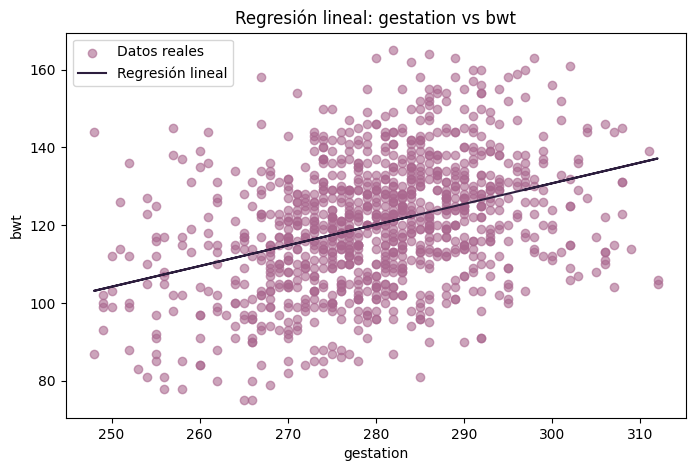

In [ ]:
Z = df_nonoutliers[['gestation']]
W = df_nonoutliers['bwt']

modelo1 = LinearRegression()
modelo1.fit(Z, W)

print(f"Intercepto: {modelo1.intercept_}")
print(f"Pendiente: {modelo1.coef_[0]}")

y_pred1 = modelo1.predict(Z)

plt.figure(figsize=(8, 5))
plt.scatter(Z, W, color=malva, label='Datos reales', alpha=0.6)
plt.plot(Z, y_pred1, color=morado, label='Regresión lineal')
plt.xlabel('gestation')
plt.ylabel('bwt')
plt.title('Regresión lineal: gestation vs bwt')
plt.legend()
plt.show()
